In [4]:
import sys
sys.path.append('/Users/jdli/Project/kurucz1/')
import torch
from kuruczone import emulator

# Load pre-trained model
model = emulator.load_from_checkpoint("../model/a_one_weights.pt")

# Create stellar parameter inputs
stellar_params = torch.tensor([[5000.0, 4.5, -0.5, 0.0]])  # Teff, log(g), [Fe/H], [α/Fe]

# Create optical depth grid (optional)
tau_grid = torch.logspace(-7, 2, 80).unsqueeze(0)  # Shape: [1, 100]

# Predict atmospheric structure
atmosphere = model.predict(stellar_params, tau_grid)

# Access variables
temperature = atmosphere['T']  # Shape: [batch_size, n_depth_points]
pressure = atmosphere['P']

Model loaded: trained for 50 epochs, final loss: 7.378867


/Users/jdli/Project/kurucz1/kuruczone/normalization.py:48: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(norm_params_path, map_location='cpu')
/Users/jdli/

Text(0, 0.5, 'Temperature (K)')

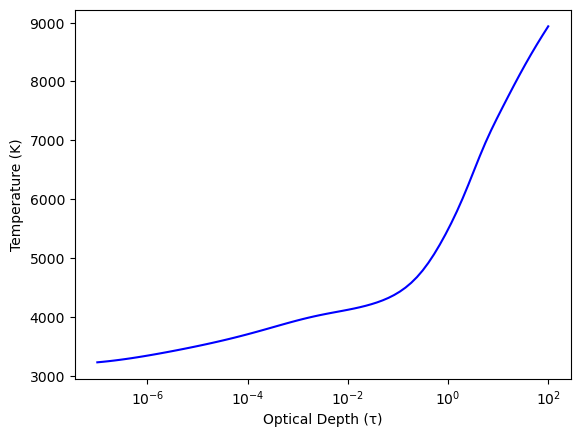

In [7]:
from matplotlib import pyplot as plt
import numpy as np

# Plot temperature profileplt.figure(figsize=(6, 4))
plt.plot(tau_grid[0], temperature[0], label='Temperature', color='blue')
plt.xscale('log')
plt.xlabel('Optical Depth (τ)')
plt.ylabel('Temperature (K)')

In [8]:
# Create multiple stellar parameter inputs
stellar_params = torch.tensor([
    [5000.0, 4.5, -0.5, 0.0],  # Model 1
    [6000.0, 4.0, 0.0, 0.0],   # Model 2
    [4500.0, 2.5, -1.0, 0.3]    # Model 3
])

# Predict atmospheric structures for all models
atmospheres = model.predict(stellar_params)

# Access variables for specific models
temperature_model1 = atmospheres['T'][0]  # First model
temperature_model2 = atmospheres['T'][1]  # Second model

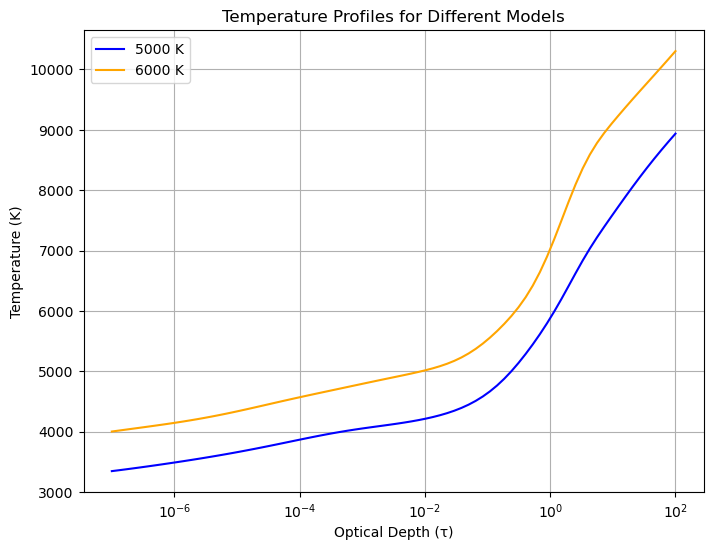

In [9]:
plt.figure(figsize=(8, 6))
plt.plot(tau_grid[0], temperature_model1, label='5000 K', color='blue')
plt.plot(tau_grid[0], temperature_model2, label='6000 K', color='orange')
plt.xscale('log')
plt.xlabel('Optical Depth (τ)')
plt.ylabel('Temperature (K)')
plt.legend()
plt.title('Temperature Profiles for Different Models')
plt.grid()
plt.show()      